In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import scipy.stats as stats
import pymc as pm
import arviz as az

sns.set_style("whitegrid")

In [2]:
train_data = pd.read_csv('train_reg.csv')
test_data = pd.read_csv('test_reg.csv')

In [3]:
x = train_data['x']
y = train_data['y']

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, ε]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 17 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.679,0.315,-1.250,-0.072,0.005,0.004,3515.0,3386.0,1.0
beta,3.080,0.048,2.988,3.171,0.001,0.001,3663.0,3370.0,1.0
ε,1.694,0.123,1.468,1.923,0.002,0.001,4546.0,4930.0,1.0


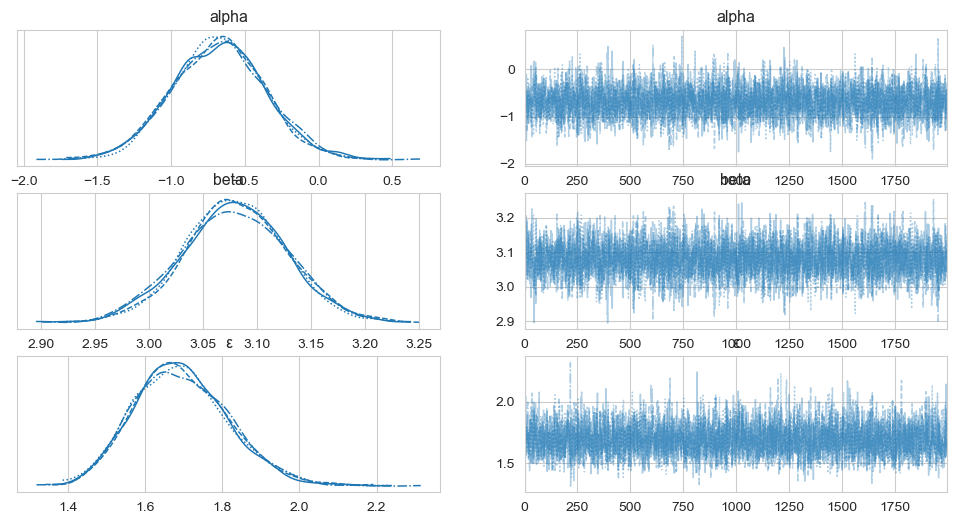

In [4]:
with pm.Model() as model_g:
    alpha = pm.Normal('alpha', mu=0, sigma=10) 
    beta = pm.Normal('beta', mu=0, sigma=1) 
    ε = pm.HalfNormal('ε', 10)
    μ = pm.Deterministic('μ', alpha + beta * x)
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y)
    trace_g = pm.sample(2000, tune=2000, chains=4, cores=4)
    
az.plot_trace(trace_g, var_names=['alpha', 'beta', 'ε']);
az.summary(trace_g).head(3)

In [5]:
alpha_est = np.mean(az.extract(trace_g)['alpha']).item()
beta_est = np.mean(az.extract(trace_g)['beta']).item()

print(f'alpha_est: {alpha_est}')
print(f'beta_est: {beta_est}')

alpha_est: -0.6788948249422203
beta_est: 3.0796631788259137


/Users/imachome/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/imachome/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/imachome/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/imachome/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

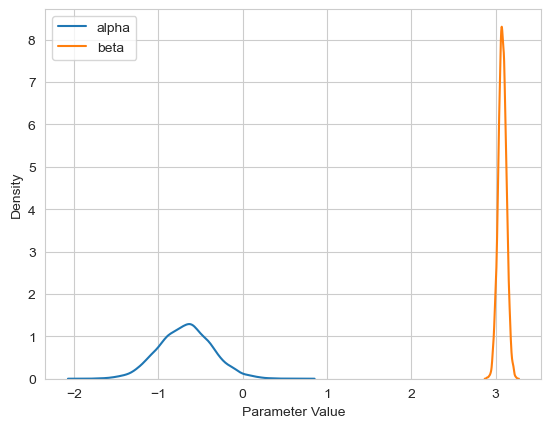

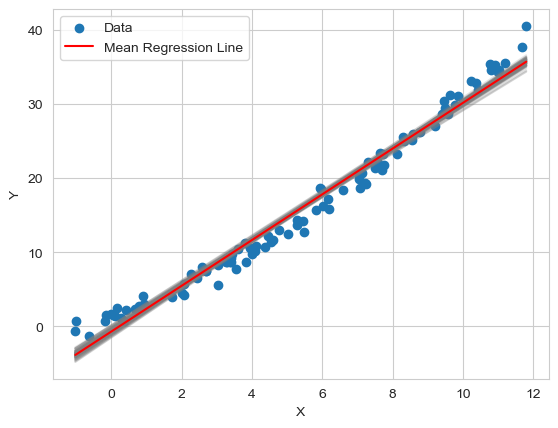

In [6]:
# Визуализация плотности распределения параметров
sns.kdeplot(az.extract(trace_g)['alpha'], label='alpha')
sns.kdeplot(az.extract(trace_g)['beta'], label='beta')
plt.xlabel('Parameter Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Визуализация регрессионной линии
plt.scatter(x, y, label='Data')
x_range = np.linspace(x.min(), x.max(), 100)
for i in range(100):  # Визуализация случайных 100 линий
    alpha_sample = az.extract(trace_g)['alpha'][i].item()
    beta_sample = az.extract(trace_g)['beta'][i].item()
    y_range = alpha_sample + beta_sample * x_range
    plt.plot(x_range, y_range, color='grey', alpha=0.2)
plt.plot(x_range, alpha_est + beta_est * x_range, color='red', label='Mean Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

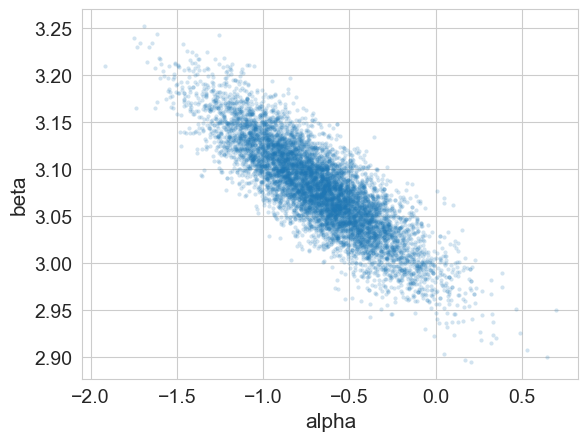

In [7]:
az.plot_pair(trace_g, var_names=['alpha', 'beta'], scatter_kwargs={'alpha': 0.2});

Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [alpha]
>Metropolis: [beta]
>Metropolis: [ε]


Sampling 3 chains for 1_000 tune and 3_000 draw iterations (3_000 + 9_000 draws total) took 12 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.689,0.318,-1.307,-0.126,0.021,0.015,230.0,498.0,1.01
beta,3.081,0.049,2.990,3.168,0.003,0.002,213.0,358.0,1.01
ε,1.692,0.126,1.465,1.942,0.004,0.003,972.0,883.0,1.00


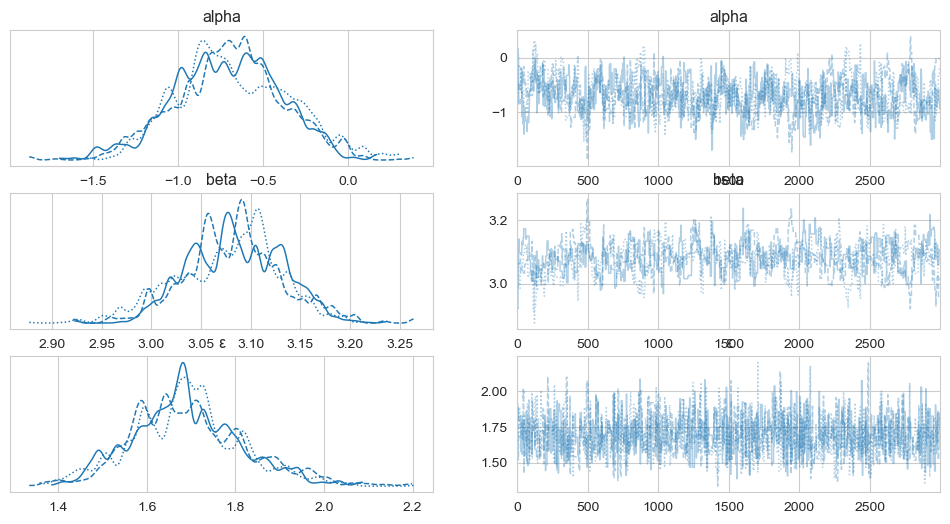

In [8]:
with pm.Model() as model_m:
    alpha = pm.Normal('alpha', mu=0, sigma=10) 
    beta = pm.Normal('beta', mu=0, sigma=1) 
    ε = pm.HalfNormal('ε', 10)
    μ = pm.Deterministic('μ', alpha + beta * x)
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y)
    trace_m = pm.sample(3000, tune=1000, step = pm.Metropolis() )
    
az.plot_trace(trace_m, var_names=['alpha', 'beta', 'ε']);
az.summary(trace_m).head(3)

Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [alpha]
>Metropolis: [beta]
>Metropolis: [ε]


Sampling 3 chains for 1_000 tune and 5_000 draw iterations (3_000 + 15_000 draws total) took 12 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.001,0.016,-0.030,0.027,0.0,0.0,1715.0,1722.0,1.0
beta,0.989,0.015,0.962,1.018,0.0,0.0,1657.0,1618.0,1.0
ε,0.153,0.011,0.134,0.174,0.0,0.0,1799.0,1900.0,1.0


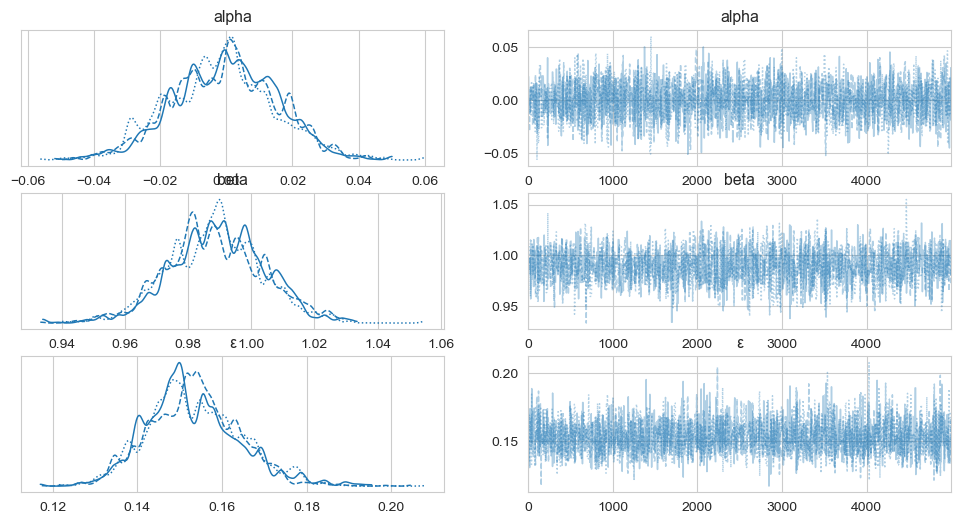

In [9]:
xm = x.mean()
xs = x.std()
ym = y.mean()
ys = y.std()

with pm.Model() as model_m:
    alpha = pm.Normal('alpha', mu=0, sigma=10) 
    beta = pm.Normal('beta', mu=0, sigma=1) 
    ε = pm.HalfNormal('ε', 10)
    μ = pm.Deterministic('μ', alpha + beta * (x-xm)/xs  )
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=(y-ym)/ys)
    trace_m = pm.sample(5000, step = pm.Metropolis() )
    
az.plot_trace(trace_m, var_names=['alpha', 'beta', 'ε']);
az.summary(trace_m).head(3)

In [10]:
posterior_g = az.extract(trace_g)


alpha_m = posterior_g['alpha'].mean().item()
beta_m  = posterior_g['beta'].mean().item()

print("всего трасс : ", posterior_g.sample.size)

draws = range(0, posterior_g.sample.size, 100)

plt.plot(x, posterior_g['alpha'][draws].values + 
                 posterior_g['beta'][draws].values * x[:,None], c='gray', alpha=0.1)

plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()

всего трасс :  8000


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/plots/hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


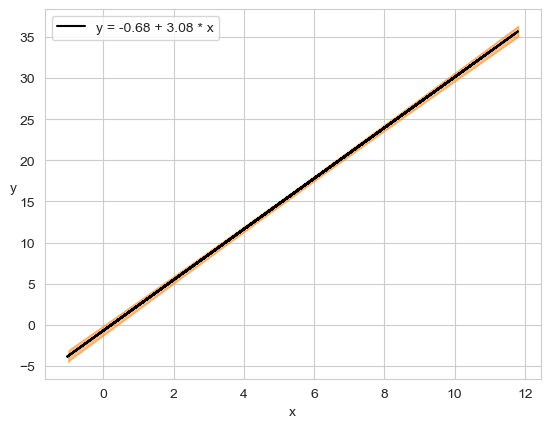

In [11]:
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

sig = az.plot_hdi(x, posterior_g['μ'].T, hdi_prob=0.94)

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend();

In [12]:
ppc = pm.sample_posterior_predictive(trace_g, model=model_g)

Sampling: [y_pred]


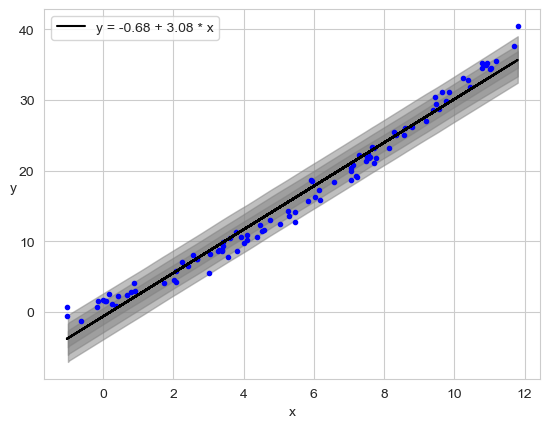

In [13]:
# Пример тройного вложения полос
ax0 = az.plot_hdi(x, ppc.posterior_predictive['y_pred'], color='gray')#, smooth=False)
ax1 = az.plot_hdi(x, ppc.posterior_predictive['y_pred'], ax=ax0, hdi_prob=0.8, color='gray') # smooth=False
az.plot_hdi(x, ppc.posterior_predictive['y_pred'], ax=ax1, hdi_prob=0.5, color='gray')  # smooth=False

plt.plot(x, y, '.', color = 'blue')
plt.plot(x, alpha_m + beta_m * x, c='k',
            label = f'y = {alpha_m:.2f} + {beta_m:.2f} * x')


plt.xlabel('x'); 
plt.ylabel('y', rotation=0);
plt.legend();

In [14]:
y_pred = alpha_est+beta_est*(test_data['x'])

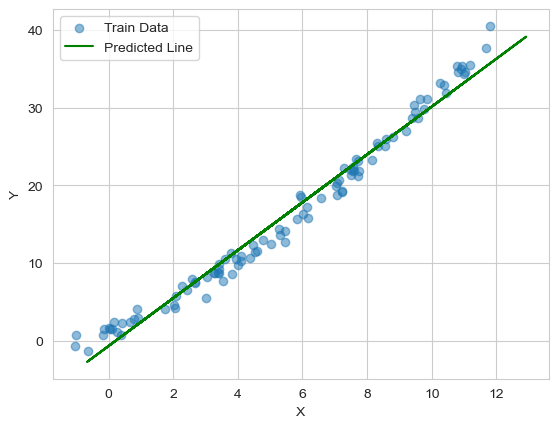

In [15]:
# Визуализация предсказанных значений
plt.scatter(x, y, label='Train Data', alpha=0.5)
plt.plot(test_data['x'], y_pred, color='green', label='Predicted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [16]:
y_pred.to_csv('predict_Bezuglova.csv')

In [19]:
from sklearn.metrics import mean_squared_error
y_true = pd.read_csv('test_Y_true_reg.csv')
mean_squared_error(y_true, y_pred)

2.370275460317362

In [18]:
y_pred

0     17.533427
1      7.506803
2     -2.730686
3     29.782941
4     21.569280
        ...    
95    27.634293
96    31.921712
97     5.002167
98     0.977675
99    19.050739
Name: x, Length: 100, dtype: float64